In [93]:
import numpy as np
from seaborn import boxplot
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import stats
from seaborn import boxplot
import scipy as sp

$$ p(x) =\begin{cases}
  e^{-x}, & x \geq 0, \\
  0, & x < 0
\end{cases} $$

## Генерируем выборку

In [94]:
N = 25
sample = np.random.exponential(scale=1.0, size = N)
print(f'выборка: {sample}')

выборка: [0.93782782 0.72842673 0.29177394 2.16492893 2.08465951 0.52759025
 4.73082097 0.67470925 0.10561818 2.96293914 2.79261991 2.91385874
 2.14021131 0.99757169 0.8539258  0.1644364  0.00819822 1.34410132
 0.89389678 0.91503184 0.28752813 0.18371971 0.4061931  0.60120711
 1.68342985]


### а) Определить по выборке моду, медиану, размех, оценку коэффициета ассиметрии

In [95]:
def find_mode(variat):
    prev_x = -1
    mx = 1
    cnt = 1
    mode = np.array([], dtype=np.float64)
    for x in variat:
        if x == prev_x:
            cnt += 1
            if mx == cnt and x not in mode:
                mode = np.append(mode, x)
            elif mx < cnt:
                mx = cnt
                mode = np.array([x], dtype=np.float64)
        elif mx == 1:
            mode = np.append(mode, x)
        else:
            cnt = 1
        prev_x = x
    return mode

In [96]:
def muk(variat, k):
    return np.sum([(x_i - np.mean(variat))**k for x_i in variat]) / len(variat)

def find_asym_coef(variat):
    return muk(variat, 3) / muk(variat, 2) ** 1.5

In [97]:
variat = sorted(sample)
scope = variat[-1] - variat[0]
med = sample[N//2] if N % 2 == 1 else (sample[N//2+1] - sample[N//2]) / 2
mode = find_mode(sample)
q1, q2 = variat[N//4], variat[N//4*3]
gamma = find_asym_coef(variat)

print(f'вариационный ряд: {variat}\n\nразмах: {scope}\n\nмедиана: {med}\n'
      f'моды: {mode}\n\nлевый квартиль: {q1}, правый квартиль: {q2}\n\nкоэффицент асимметрии: {gamma}')


вариационный ряд: [np.float64(0.008198220942802445), np.float64(0.10561817617193421), np.float64(0.1644364028600409), np.float64(0.18371971345607677), np.float64(0.2875281336879085), np.float64(0.2917739444944686), np.float64(0.4061930966554777), np.float64(0.5275902469680483), np.float64(0.6012071053845857), np.float64(0.6747092510011765), np.float64(0.7284267289438989), np.float64(0.8539257983842264), np.float64(0.8938967770126383), np.float64(0.9150318441717183), np.float64(0.9378278202476834), np.float64(0.9975716917515945), np.float64(1.344101317523025), np.float64(1.6834298508823937), np.float64(2.084659505252388), np.float64(2.1402113099296916), np.float64(2.164928934832636), np.float64(2.792619907702058), np.float64(2.913858741451265), np.float64(2.962939136471437), np.float64(4.7308209652753845)]

размах: 4.722622744332582

медиана: 2.1402113099296916
моды: [0.93782782 0.72842673 0.29177394 2.16492893 2.08465951 0.52759025
 4.73082097 0.67470925 0.10561818 2.96293914 2.7926199

### б) построить эмпирическую функцию распределения, гистограмму и boxplot

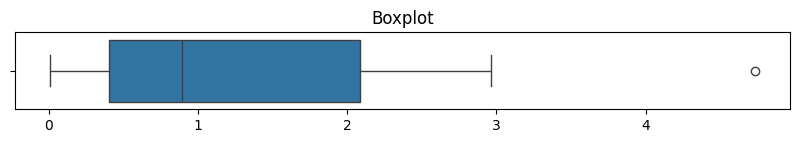

In [98]:
_, ax = plt.subplots(1, 1, figsize=(10, 1))
ax.set_title("Boxplot")
boxplot(x=variat)
plt.show()

C:\Users\123va\AppData\Local\Temp\ipykernel_16180\4257118150.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


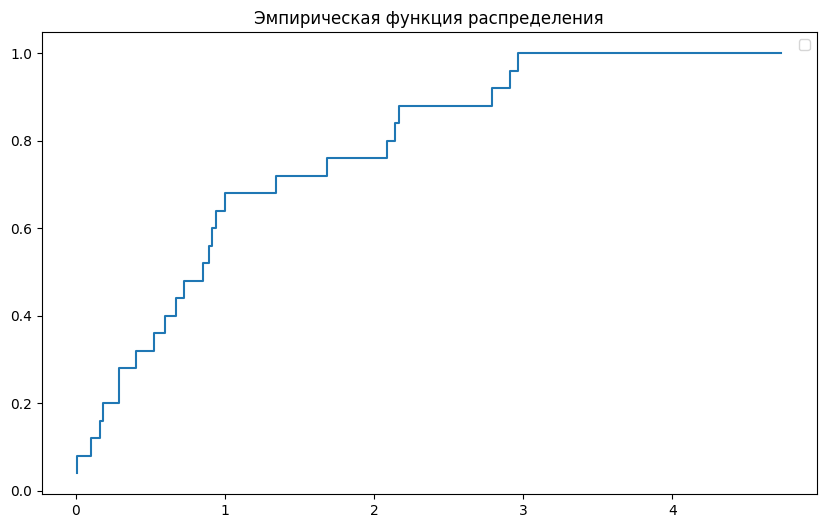

In [99]:
_, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.set_title("Эмпирическая функция распределения")

ax.step(variat, np.arange(1, N + 1) / N)

plt.legend()
plt.show()

C:\Users\123va\AppData\Local\Temp\ipykernel_16180\1650032361.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


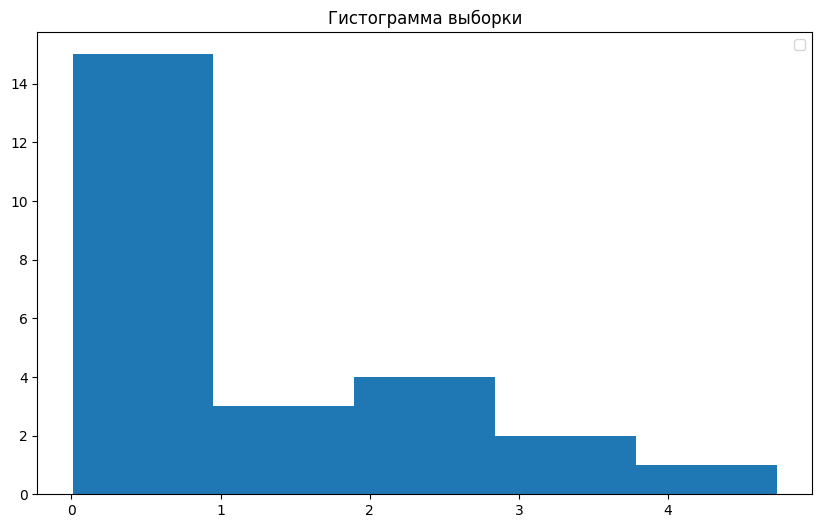

In [100]:
_, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.set_title("Гистограмма выборки")

ax.hist(variat, bins=int(1 + np.log2(N)))

plt.legend()
plt.show()

### c) Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности

![image](./T2(c).jpg)

In [115]:
btst_iter = 1000

mu = 1
sigma = 1/5
btst_sample = sample[np.random.choice(len(sample), size=(btst_iter, len(sample)))]
btst_mean = np.mean(btst_sample, axis=1)

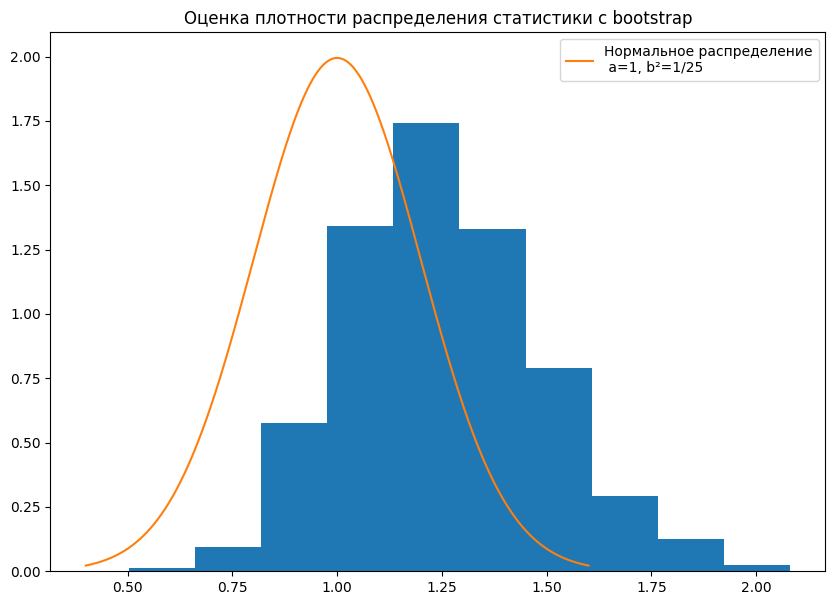

In [116]:
_, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_title("Оценка плотности распределения статистики с bootstrap")

ax.hist(btst_mean,
          bins=1+int(np.log2(btst_iter)),
          density=True)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
ax.plot(x, sp.stats.norm.pdf(x, mu, sigma),
         label="Нормальное распределение\n a=1, b²=1/25")

plt.legend()
plt.show()

### d) Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность тгого, что коэффициент асиммертии будет меньше 1

In [103]:
btst_skewness = []

for _ in range(btst_iter):
    btst_sample = np.random.choice(sample, size=len(sample))
    btst_skewness.append(find_asym_coef(btst_sample.tolist()))

prob_skew_less_than_1 = np.sum([1 if btst_skewness[i] < 1 
    else 0 for i in range(btst_iter)])/btst_iter
print(f'оценка, что коэффицент асимметрии будет < 1: {prob_skew_less_than_1}')

оценка, что коэффицент асимметрии будет < 1: 0.424


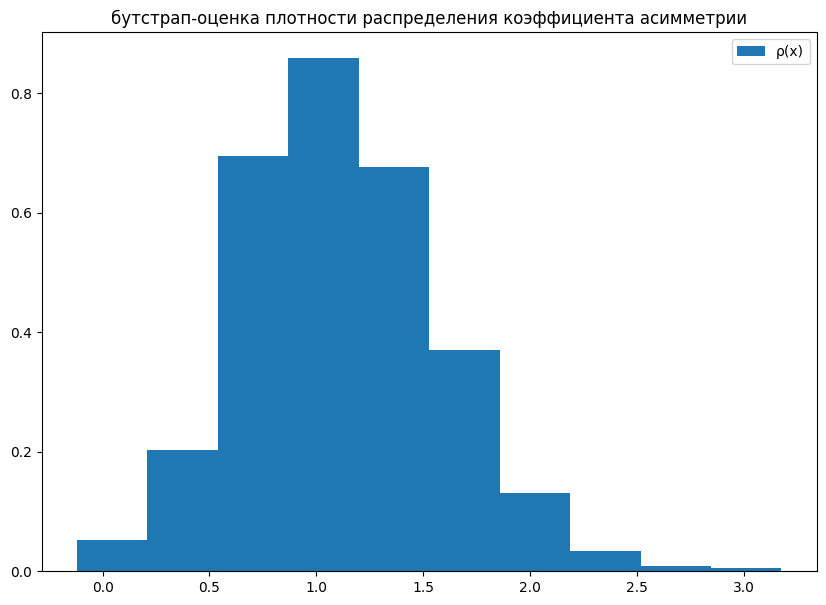

In [104]:
_, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_title("бутстрап-оценка плотности распределения коэффициента асимметрии")

ax.hist(btst_skewness,
          bins=1 + int(np.log2(btst_iter)),
          label="ρ(x)",
          density=True)

plt.legend()
plt.show()

### e) Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

In [105]:
def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

def F(x: float) -> float:
    return (1 - np.exp(-x)) if x >= 0 else 0

def Kappa(x):
    k = N // 2 + 1
    return N * p(x) * sp.special.comb(N - 1, k - 1) * ((1 - F(x)) ** (N - k)) * (F(x) ** (k - 1))

In [106]:
btst_med = []

for _ in range(btst_iter):
    btst_med.append(np.median(np.random.choice(sample,
                                                        size=len(sample),
                                                        replace=True)))

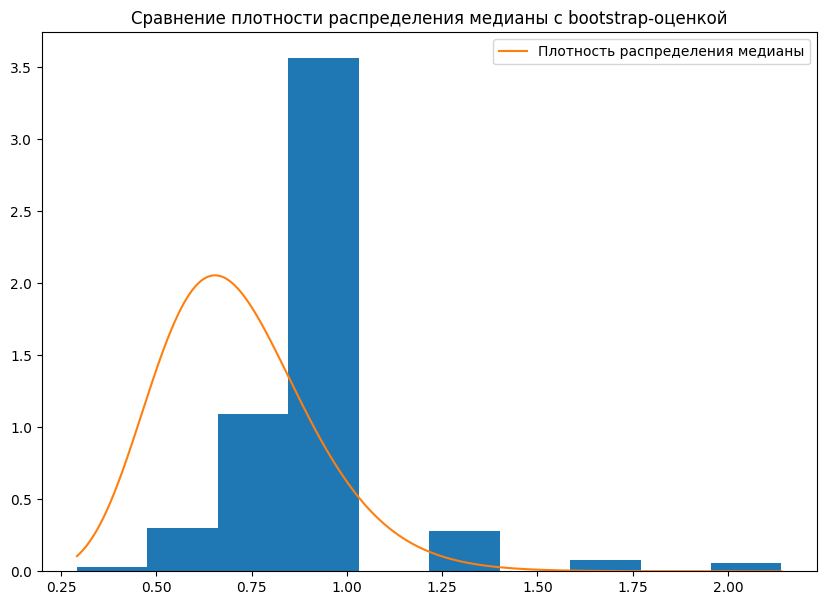

In [107]:
_, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_title("Сравнение плотности распределения медианы с bootstrap-оценкой")

ax.hist(btst_med,
         bins=int(1 + np.log2(btst_iter)),
         density=True)

x = np.linspace(min(btst_med),
                max(btst_med),
                btst_iter)
ax.plot(x,
         [Kappa(x_i) for x_i in x],
         label="Плотность распределения медианы")

plt.legend()
plt.show()